## CBZ Exposure Data Predictions 

In this notebook, CBZ exposure with 43603 probes are exposed to high and low concentrations of CBZ in both female and male samples. The result from the data is normalized, trained and have training models (random forest and logistic regression) done on it. Test performances were done on test samples and eventually, the goal is to find signature probes during CBZ exposure in order to identity CBZ presence in waste water samples. 

In [213]:
import pandas as pd 

df = pd.read_csv('CBZ_.csv')
df = df.set_index('Probe')

print(df)

              Female CBZ C1  Female CBZ C2  Female CBZ C3  Female CBZ H1  \
Probe                                                                      
A_15_P100002     732.140686     751.492957    1061.578781     608.569518   
A_15_P100003       5.642436      12.280938       9.643904       5.000000   
A_15_P100007      24.650720      19.237571      71.626645      37.191560   
A_15_P100008     288.779800     207.017687     394.963392     280.217800   
A_15_P100009       8.344403      12.280938      10.741866       5.000000   
...                     ...            ...            ...            ...   
WilsonLab_58     115.665400     153.229708      80.470819      93.237120   
WilsonLab_61      50.938440     128.221837     126.252399      90.193260   
WilsonLab_64      12.644100      12.671796      10.920070      13.307450   
WilsonLab_70      83.487090     141.864240     252.289739      66.762990   
WilsonLab_9     1142.360579    1568.685640     989.652217     538.651458   

           

In [214]:
df.sort_values('Probe')

,Female CBZ C1,Female CBZ C2,Female CBZ C3,Female CBZ H1,Female CBZ H2,Female CBZ H3,Female CBZ L1,Female CBZ L2,Female CBZ L3,Male CBZ C1,Male CBZ C2,Male CBZ C3,Male CBZ H1,Male CBZ H2,Male CBZ H3,Male CBZ L1,Male CBZ L2,Male CBZ L3
Probe,,,,,,,,,,,,,,,,,,
A_15_P100002,732.140686,751.492957,1061.578781,608.569518,581.437557,804.785507,677.102713,820.093903,1187.151127,490.110294,869.657408,1377.984778,98.788884,820.036582,569.465271,879.937898,446.922100,1340.830973
A_15_P100003,5.642436,12.280938,9.643904,5.000000,11.570123,5.000000,10.536166,5.000000,7.309313,7.389305,5.000000,5.000000,49.042168,8.774943,2.128546,8.394425,5.000000,6.510827
A_15_P100007,24.650720,19.237571,71.626645,37.191560,46.763869,5.847644,11.190816,17.888300,7.309313,16.869592,74.450550,62.207950,7.975756,111.022225,26.937968,117.951642,85.010230,82.213247
A_15_P100008,288.779800,207.017687,394.963392,280.217800,215.583580,235.551200,214.789861,195.551700,376.153766,200.413769,309.702900,388.909200,83.041270,261.430114,326.395130,211.716896,183.620600,262.708503
A_15_P100009,8.344403,12.280938,10.741866,5.000000,13.049023,16.743000,10.536166,5.786274,28.202253,7.389305,27.037550,46.591120,12.356686,30.573884,25.363145,21.958457,5.520190,56.938176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WilsonLab_58,115.665400,153.229708,80.470819,93.237120,170.356594,90.051400,128.986001,68.633140,42.226691,303.839065,130.931500,116.020100,172.721413,134.148692,60.899244,40.917446,215.733800,73.547596
WilsonLab_61,50.938440,128.221837,126.252399,90.193260,90.836665,141.790000,138.022997,52.466680,112.628941,61.371741,110.861800,189.290700,96.746833,226.345085,93.653486,74.022696,93.214500,184.739000
WilsonLab_64,12.644100,12.671796,10.920070,13.307450,15.077779,74.779640,19.866729,10.995490,44.662885,7.389305,12.785740,56.294700,30.856709,17.560907,15.144607,8.843011,9.884618,8.071839


In [215]:
df.describe()

,Female CBZ C1,Female CBZ C2,Female CBZ C3,Female CBZ H1,Female CBZ H2,Female CBZ H3,Female CBZ L1,Female CBZ L2,Female CBZ L3,Male CBZ C1,Male CBZ C2,Male CBZ C3,Male CBZ H1,Male CBZ H2,Male CBZ H3,Male CBZ L1,Male CBZ L2,Male CBZ L3
count,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000
mean,1161.089432,1191.436707,1213.060193,1178.186325,1170.456578,1191.374663,1194.571627,1170.344904,1189.543697,1156.569532,1205.277901,1197.229432,1150.602238,1204.063193,1206.217083,1170.598182,1173.822811,1185.062553
std,6790.479860,6990.052555,7086.457312,6756.484820,6900.348501,6708.569614,7008.950553,6849.983882,6841.017121,7020.089745,7006.725247,6861.668656,7528.724027,7027.317050,6960.391271,6705.206792,6870.177607,6866.715290
min,5.000000,12.280938,9.643904,5.000000,11.570123,5.000000,10.536166,5.000000,7.309313,7.389305,5.000000,5.000000,6.437982,8.774943,2.128546,7.699036,5.000000,6.510827
25%,5.000000,12.280938,9.643904,5.089004,11.570123,6.309611,10.536166,5.000000,7.309313,7.389305,5.000000,5.000000,9.840814,8.774943,3.963981,8.628162,5.000000,6.510827
50%,20.519030,29.178600,23.384693,28.169750,30.411837,36.546310,27.043515,20.819880,23.653580,21.802071,26.436530,30.207490,27.364632,25.560724,27.414979,25.256207,21.724470,24.264005
75%,177.642450,203.470412,260.545403,214.937800,179.916743,312.647150,204.515319,160.622950,267.761478,142.120730,264.553200,319.477563,106.288747,235.427940,224.028778,255.869350,172.732950,240.172902
max,140778.928000,178960.000000,178960.000000,128570.915200,152580.047000,120407.113100,175698.330900,146429.991100,149255.907700,178960.000000,178960.000000,147472.956300,342456.858200,145042.130800,173483.560500,129729.272900,140425.885200,163422.196900


# Normalization 

In [216]:
from sklearn import preprocessing 
%matplotlib inline

In [217]:
x = df[['Female CBZ C1','Female CBZ C2','Female CBZ C3', 'Female CBZ H1', 'Female CBZ H2', 'Female CBZ H3', 'Female CBZ L1', 'Female CBZ L2', 'Female CBZ L3', 'Male CBZ C1','Male CBZ C2','Male CBZ C3','Male CBZ L1','Male CBZ L2', 'Male CBZ L3', 'Male CBZ H1', 'Male CBZ H2', 'Male CBZ H3']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

In [218]:
df_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.005165,0.004131,0.005878,0.004695,0.003735,0.006643,0.003794,0.005567,0.007905,0.002697,0.004832,0.009310,0.006724,0.003147,0.008165,0.000270,0.005594,0.003270
1,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000124,0.000000,0.000000
2,0.000140,0.000039,0.000346,0.000250,0.000231,0.000007,0.000004,0.000088,0.000000,0.000053,0.000388,0.000388,0.000850,0.000570,0.000463,0.000004,0.000705,0.000143
3,0.002016,0.001088,0.002153,0.002141,0.001337,0.001915,0.001163,0.001301,0.002471,0.001079,0.001703,0.002603,0.001573,0.001272,0.001568,0.000224,0.001742,0.001869
4,0.000024,0.000000,0.000006,0.000000,0.000010,0.000098,0.000000,0.000005,0.000140,0.000000,0.000123,0.000282,0.000110,0.000004,0.000309,0.000017,0.000150,0.000134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43598,0.000786,0.000788,0.000396,0.000686,0.001041,0.000706,0.000674,0.000435,0.000234,0.001657,0.000704,0.000753,0.000256,0.001501,0.000410,0.000486,0.000864,0.000339
43599,0.000326,0.000648,0.000652,0.000663,0.000520,0.001136,0.000726,0.000324,0.000706,0.000302,0.000592,0.001250,0.000511,0.000628,0.001091,0.000264,0.001500,0.000528
43600,0.000054,0.000002,0.000007,0.000065,0.000023,0.000580,0.000053,0.000041,0.000250,0.000000,0.000044,0.000348,0.000009,0.000035,0.000010,0.000071,0.000061,0.000075
43601,0.000558,0.000724,0.001356,0.000480,0.000707,0.002790,0.000815,0.000761,0.001538,0.000125,0.001076,0.001127,0.000269,0.000804,0.000619,0.000082,0.000668,0.000591


# PCA

PCA is divided into 2 parts: data visualization and speed up machine learning algorithm 

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb

In [220]:
from sklearn.preprocessing import StandardScaler
features = ['Female CBZ H1', 'Female CBZ H2', 'Female CBZ H3','Female CBZ L1', 'Female CBZ L2', 'Female CBZ L3','Male CBZ H1', 'Male CBZ H2', 'Male CBZ H3', 'Male CBZ L1','Male CBZ L2', 'Male CBZ L3']
x = df.loc[:, features].values
y = df.loc[:,['Female CBZ C1', 'Female CBZ C2', 'Female CBZ C3','Male CBZ C1', 'Male CBZ C2', 'Male CBZ C3']].values
x = StandardScaler().fit_transform(x)

In [221]:
df.replace([np.inf, -np.inf], np.nan) 
df = df.dropna(axis = 1, how = 'any')
df = df._get_numeric_data()

In [222]:
x = df.values
x = scale(x);x

array([[-0.06316986, -0.06293927, -0.02137643, ..., -0.04334894,
        -0.10580644,  0.02268482],
       [-0.17015885, -0.16869248, -0.16982112, ..., -0.17333054,
        -0.17013188, -0.1716345 ],
       [-0.16735956, -0.16769725, -0.16107437, ..., -0.15699122,
        -0.15848572, -0.16060983],
       ...,
       [-0.16912774, -0.16863656, -0.16964103, ..., -0.17326363,
        -0.16942088, -0.17140717],
       [-0.15869493, -0.15015402, -0.13557994, ..., -0.16823857,
        -0.15370028, -0.15691146],
       [-0.00275814,  0.05397002, -0.03152641, ..., -0.0675327 ,
        -0.03129728, -0.03805492]])

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', svd_solver='full')
pca.fit(x)
print(pca)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [224]:
print(pca.explained_variance_ratio_)

[9.12805045e-01 3.36339575e-02 1.32303367e-02 1.01246677e-02
 6.55463058e-03 3.99498857e-03 3.56443197e-03 2.90246829e-03
 2.56607295e-03 1.93486198e-03 1.67301064e-03 1.43254328e-03
 1.28682835e-03 1.07419072e-03 9.77420630e-04 8.80119106e-04
 7.63101844e-04]


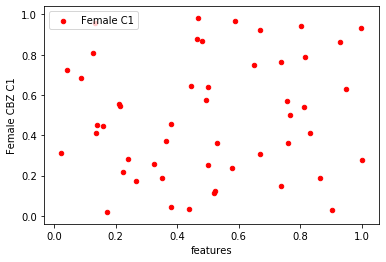

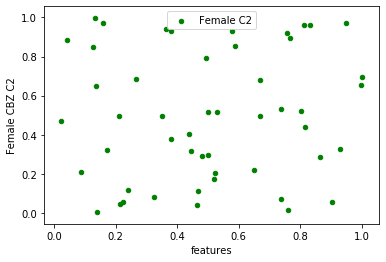

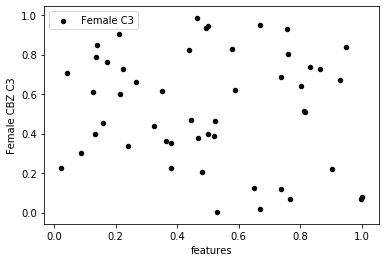

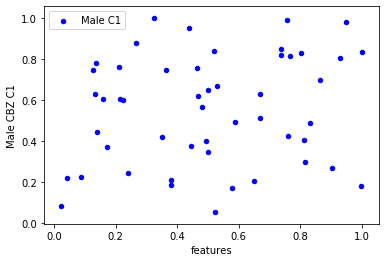

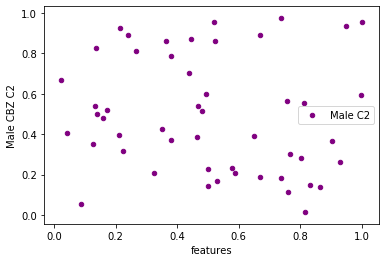

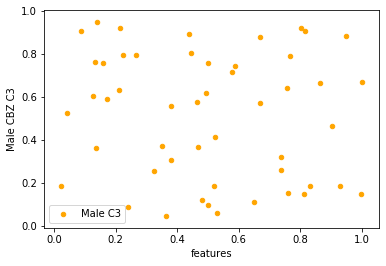

In [225]:
import matplotlib.pyplot as plt

df1 = pd.DataFrame(np.random.rand(50, 7), columns=['features','Female CBZ C1', 'Female CBZ C2', 'Female CBZ C3','Male CBZ C1', 'Male CBZ C2', 'Male CBZ C3'])
ax = df1.plot.scatter(x='features', y='Female CBZ C1', color='red', label='Female C1')
ax = df1.plot.scatter(x='features', y='Female CBZ C2', color='green', label='Female C2')
ax = df1.plot.scatter(x='features', y='Female CBZ C3', color='black', label='Female C3')
ax = df1.plot.scatter(x='features', y='Male CBZ C1', color='blue', label='Male C1')
ax = df1.plot.scatter(x='features', y='Male CBZ C2', color='purple', label='Male C2')
ax = df1.plot.scatter(x='features',y='Male CBZ C3', color='orange', label='Male C3')

In [226]:
pca.explained_variance_ratio_


array([9.12805045e-01, 3.36339575e-02, 1.32303367e-02, 1.01246677e-02,
       6.55463058e-03, 3.99498857e-03, 3.56443197e-03, 2.90246829e-03,
       2.56607295e-03, 1.93486198e-03, 1.67301064e-03, 1.43254328e-03,
       1.28682835e-03, 1.07419072e-03, 9.77420630e-04, 8.80119106e-04,
       7.63101844e-04])

# Adding a Gender Column

Female = 1
Male = 2

In [227]:
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import svm
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble
import pandas as pd
import numpy as np

In [228]:
df_transpose = df.transpose()
print(f'Transposed Array:\n{df_transpose}')

Transposed Array:
Probe          A_15_P100002  A_15_P100003  A_15_P100007  A_15_P100008  \
Female CBZ C1    732.140686      5.642436     24.650720    288.779800   
Female CBZ C2    751.492957     12.280938     19.237571    207.017687   
Female CBZ C3   1061.578781      9.643904     71.626645    394.963392   
Female CBZ H1    608.569518      5.000000     37.191560    280.217800   
Female CBZ H2    581.437557     11.570123     46.763869    215.583580   
Female CBZ H3    804.785507      5.000000      5.847644    235.551200   
Female CBZ L1    677.102713     10.536166     11.190816    214.789861   
Female CBZ L2    820.093903      5.000000     17.888300    195.551700   
Female CBZ L3   1187.151127      7.309313      7.309313    376.153766   
Male CBZ C1      490.110294      7.389305     16.869592    200.413769   
Male CBZ C2      869.657408      5.000000     74.450550    309.702900   
Male CBZ C3     1377.984778      5.000000     62.207950    388.909200   
Male CBZ H1       98.788884     4

In [229]:
df_transpose['gender'] = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
print(f'Transposed Array:\n{df_transpose}')

Transposed Array:
Probe          A_15_P100002  A_15_P100003  A_15_P100007  A_15_P100008  \
Female CBZ C1    732.140686      5.642436     24.650720    288.779800   
Female CBZ C2    751.492957     12.280938     19.237571    207.017687   
Female CBZ C3   1061.578781      9.643904     71.626645    394.963392   
Female CBZ H1    608.569518      5.000000     37.191560    280.217800   
Female CBZ H2    581.437557     11.570123     46.763869    215.583580   
Female CBZ H3    804.785507      5.000000      5.847644    235.551200   
Female CBZ L1    677.102713     10.536166     11.190816    214.789861   
Female CBZ L2    820.093903      5.000000     17.888300    195.551700   
Female CBZ L3   1187.151127      7.309313      7.309313    376.153766   
Male CBZ C1      490.110294      7.389305     16.869592    200.413769   
Male CBZ C2      869.657408      5.000000     74.450550    309.702900   
Male CBZ C3     1377.984778      5.000000     62.207950    388.909200   
Male CBZ H1       98.788884     4

# PCA on Gender

In [230]:
x = df_transpose.drop('gender', axis=1).T.values
y = df_transpose['gender'].T.values
xgenderPCA = StandardScaler().fit_transform(x)
print(xgenderPCA.shape)

(43603, 18)


In [231]:
xgenderPCA = PCA(n_components='mle', svd_solver='full')
xgenderPCA.fit

<bound method PCA.fit of PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='full', tol=0.0, whiten=False)>

TypeError: 'str' object is not callable

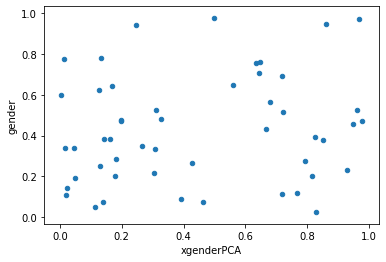

In [232]:
df2 = pd.DataFrame(np.random.rand(50, 2), columns=['xgenderPCA', 'gender'])

df2.plot.scatter(x='xgenderPCA', y='gender')
plt.title('PCA Analysis on CBZ Exposure after Gender Catgorization', fontsize = 16)

In [233]:
pca.explained_variance_ratio_

array([9.12805045e-01, 3.36339575e-02, 1.32303367e-02, 1.01246677e-02,
       6.55463058e-03, 3.99498857e-03, 3.56443197e-03, 2.90246829e-03,
       2.56607295e-03, 1.93486198e-03, 1.67301064e-03, 1.43254328e-03,
       1.28682835e-03, 1.07419072e-03, 9.77420630e-04, 8.80119106e-04,
       7.63101844e-04])

## Train and Test Split, Cross Validation Output

In [234]:
df.dtypes 

Female CBZ C1    float64
Female CBZ C2    float64
Female CBZ C3    float64
Female CBZ H1    float64
Female CBZ H2    float64
Female CBZ H3    float64
Female CBZ L1    float64
Female CBZ L2    float64
Female CBZ L3    float64
Male CBZ C1      float64
Male CBZ C2      float64
Male CBZ C3      float64
Male CBZ H1      float64
Male CBZ H2      float64
Male CBZ H3      float64
Male CBZ L1      float64
Male CBZ L2      float64
Male CBZ L3      float64
dtype: object

In [235]:
from sklearn.model_selection import train_test_split
X = df_transpose
y = [0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, stratify=y)

In [236]:
print(X_train.shape, len(y_train), X_test.shape, len(y_test))

(14, 43604) 14 (4, 43604) 4


In [237]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.6       , 0.5       , 0.66666667, 0.33333333, 0.66666667])

In [238]:
>>> from sklearn import metrics
>>> scores = cross_val_score(
...     clf, X, y, cv=5, scoring='f1')
>>> scores

/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.75      , 0.5       , 0.8       , 0.        , 0.66666667])

In [243]:
import sklearn
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)
X_train_pred = clf.predict(X_train)

/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [249]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [250]:
print(regressor.intercept_)
# for intercept 

1.1478792889027243


In [251]:
print(regressor.coef_)
# to get the slope

[-6.76711356e-08  3.87827197e-08 -1.64456347e-08 ... -8.03028674e-10
  1.12995070e-08 -4.34919568e-14]


In [260]:
y_pred = regressor.predict(X_test)

#use our test data and see how accurately our algorithm predicts the percentage score. 
# Make prediction 